<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/dl_master/dl_master_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL Master node 9

### 목차

9. 딥러닝 모델 실습

### 9. 딥러닝 모델 실습

**학습 목표**

* Fashion MNIST 데이터셋을 이용해 딥러닝 모델을 실습합니다.
* 딥러닝 모델의 다양한 학습 기술과 최적화를 실습합니다.

**데이터 로드**

Fashion MNIST 데이터셋은 케라스에 내장되어 있으며 fashion_mnist를 임포트하고, load_data()를 호출하여 데이터셋을 로드할 수 있습니다. 학습용 데이터셋에서 30% 정도를 검증용 데이터셋으로 만들기 위해서 train_test_split() 함수를 이용해 분리합니다. 최종적으로 딥러닝 모델에 사용할 학습, 검증, 테스트 데이터의 갯수를 출력해서 확인합니다.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


Fashion MNIST 데이터셋에서 사용되는 총 10개의 클래스 이름을 class_names 변수로 지정합니다. 클래스 이름은 Fashion MNIST 깃헙에서 확인하실 수 있습니다.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

학습 데이터의 레이블 y_train에서 0번째가 무엇인지 출력하면 6이 출력되고, 실제 6이 어떤 클래스인지는 미리 정의한 class_names 리스트에 매칭된 이름으로 Shirt가 출력된 것을 알 수 있습니다.

In [ ]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


학습 데이터 x_train에서 0번째가 어떻게 구성되어 있는지 출력합니다.

In [ ]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

학습 데이터는 이미지라서 0~255의 값을 가지고 있고, 이를 이미지로 imshow()를 이용해 출력합니다. 값의 범위를 보기 위해 colorbar()를 이용해 출력합니다.

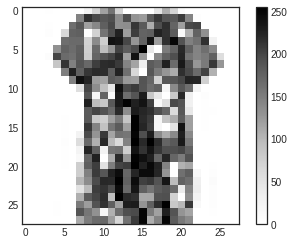

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

Fashion MNIST 데이터셋을 확인하기 위해서 전체 학습 데이터 60,000개 중에서 랜덤으로 4개를 선택하여 인덱스와 레이블, 그리고 해당 패션 이미지를 출력합니다.

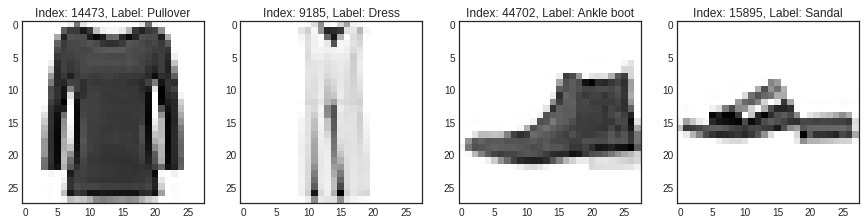

In [ ]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

**데이터 전처리**

딥러닝 모델에서 효과적으로 학습시키기 위해서 입력 데이터를 적절하게 전처리 해주어야 합니다. 기본적으로 데이터셋은 28 x 28 크기의 이미지가 학습 데이터 42,000개, 검증 데이터 18,000개, 테스트 데이터 10,000개로 구성되어 있습니다.

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


딥러닝 모델에서 Flatten 레이어를 거쳐도 가능하지만, 미리 데이터셋을 reshape()를 통해 28 * 28 크기인 784로 모양을 바꾸어줍니다. 여기서 reshape()을 할 때, 훈련 데이터는 (42000, 784), 검증 데이터는 (18000, 784), 테스트 데이터는 (10000, 784)로 지정해도 되지만, 28 * 28로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추도록 하였습니다.

In [ ]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


학습 데이터 중에서 0번째 값을 출력해보면, 0부터 255까지의 숫자로 구성되어 있기 때문에 숫자의 범위를 전처리를 통해서 줄여줄 필요가 있습니다.

In [ ]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

기존 데이터셋을 255.0으로 나눠주면 아주 간단하게 0 ~ 255 숫자 범위를 0 ~ 1의 범위로 줄일 수 있습니다.

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

**모델 구성**

Fashion MNIST 데이터셋을 패션 종류별로 분류하기 위한 딥러닝 모델을 정의하기 위해 Sequential() 함수를 사용합니다. 첫번째 입력 레이어 Input 으로는 전처리에서 바꾼 모양대로 784개의 형태를 가지도록 하고, 두 번째 레이어는 유닛수 512개와 sigmoid 활성화 함수를 가지는 Dense 레이어를 추가합니다. 그리고 마지막은 분류 갯수인 10으로 유닛수를 지정하고, softmax 활성화 함수를 사용하는 Dense 레이어를 추가합니다.

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**모델 컴파일 및 학습**

모델에 사용할 옵티마이저는 SGD를 사용하고, 손실 함수는 다중 분류에 레이블이 정수로 인코딩 되어 있으므로 sparse_categorical_crossentropy를 지정하며, 지표는 accuracy를 사용합니다.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Fashion MNIST 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고, 에폭(epochs)은 60으로 지정하며, 배치 사이즈는 512로 지정하고, 검증을 위해서는 검증 데이터로 분리시킨 x_val와 y_val를 지정하여 fit() 함수를 실행시킵니다.

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 2s 7ms/step - loss: 2.1733 - accuracy: 0.3735 - val_loss: 2.0303 - val_accuracy: 0.4965
Epoch 2/60
83/83 [==============================] - 0s 4ms/step - loss: 1.9081 - accuracy: 0.5996 - val_loss: 1.8050 - val_accuracy: 0.5555
Epoch 3/60
83/83 [==============================] - 0s 3ms/step - loss: 1.7056 - accuracy: 0.6553 - val_loss: 1.6261 - val_accuracy: 0.6013
Epoch 4/60
83/83 [==============================] - 0s 4ms/step - loss: 1.5449 - accuracy: 0.6779 - val_loss: 1.4788 - val_accuracy: 0.6557
Epoch 5/60
83/83 [==============================] - 0s 3ms/step - loss: 1.4175 - accuracy: 0.6933 - val_loss: 1.3622 - val_accuracy: 0.6988
Epoch 6/60
83/83 [==============================] - 0s 4ms/step - loss: 1.3157 - accuracy: 0.7043 - val_loss: 1.2763 - val_accuracy: 0.6838
Epoch 7/60
83/83 [==============================] - 0s 4ms/step - loss: 1.2337 - accuracy: 0.7081 - val_loss: 1.1998 - val_accuracy: 0.6948
Epoch 8/60
83/83 [==

모델의 학습 과정을 저장한 history에 포함되어 있는 loss, val_loss, accuracy, val_accuracy를 차트로 시각화하는 show_history() 함수를 정의합니다.

In [ ]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

정의한 show_history() 함수를 이용해 모델 학습 결과인 history를 시각화합니다.

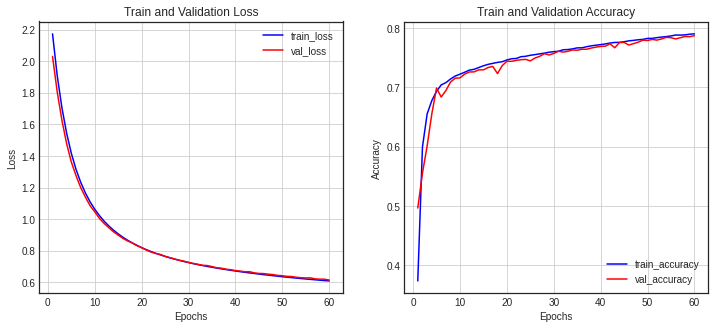

In [ ]:
show_history(history)

**모델 평가 및 예측**

모델이 학습한 결과를 평가하기 위해서는 테스트 데이터셋인 x_test와 y_test를 지정하여 evaluate()를 실행시킵니다. 실행 결과로는 모델이 테스트 데이터셋에서는 어느 정도의 성능이 나오는지 loss와 accuracy 값을 살펴볼 수 있습니다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6267 - accuracy: 0.7797


[0.6267476081848145, 0.779699981212616]

학습된 모델을 이용해서 예측을 하기 위해서는 predict()를 실행시킵니다. 테스트 데이터 셋인 x_test에 대해 모델의 예측 결과인 pred_ys 중에 5번째를 출력해보면, 분류 10개마다 얼만큼의 비율로 예측했는지 알 수 있습니다.

분류 10개의 각 값들 중에 가장 큰 값이 있는 위치를 반환하도록 argmax()를 수행한 결과를 arg_pred_y에 저장합니다. 그리고 예시로 5번째를 출력해보면 결과로 1이 나오는 것을 알 수 있습니다. 인덱스 1에 해당하는 클래스가 무엇인지 class_names 리스트에서 가져오면 Trouser가 출력되는 것을 알 수 있습니다.

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

[1.1973057e-02 9.4391090e-01 3.5007801e-03 1.5827248e-02 1.7685760e-02
 4.1575488e-05 6.9316574e-03 3.1806128e-05 8.4506137e-05 1.2664955e-05]
1
Trouser


이미지와 모델이 예측한 결과값을 함께 출력해보면 바지 이미지와 함께 예측한 결과가 출력된 것을 알 수 있습니다.

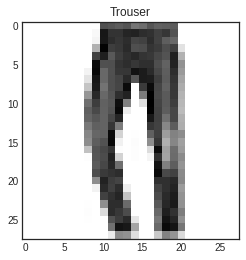

In [ ]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

이미지와 레이블을 함께 출력하기 위해서 plot_image() 함수를 정의합니다. 모델이 예측한 값인 pred_ys, 테스트 데이터셋의 정답인 y_test, 그리고 이미지 img에 대해서 i 번째를 가져와서 출력을 수행합니다. 여기서 예측한 결과 레이블인 predicted_label과 정답 레이블인 y_test가 동일하면 색으로 blue를 사용하고, 다르면 red 색을 사용하도록 지정합니다. 이제 예측한 레이블의 이름, 예측한 확률값, 실제 정답 레이블의 이름을 지정한 색으로 출력합니다.

In [ ]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력해주는 plot_class() 함수를 정의합니다. 예측한 결과 레이블인 pred_ys와 정답 레이블인 true_label에서 i 번째의 데이터에 대한 10개 클래스 값들을 바 차트로 시각화합니다. 기본적으로는 색을 darkgray로 지정하고, 예측한 레이블은 red 색상으로 표시하고, 정답 레이블은 blue 색상으로 표시합니다.

In [ ]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

5번째 데이터에 대해서 정의한 plot_image()와 plot_class() 함수를 호출하여 시각화합니다. 결과를 보면 모델이 Trouser라고 95% 확률로 예측한 것을 알 수 있습니다.

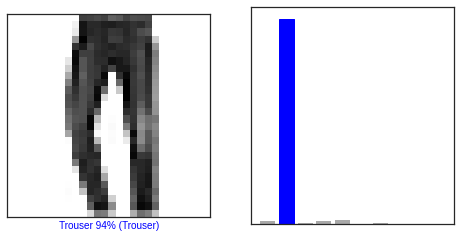

In [ ]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

10번째 데이터에 대해서도 마찬가지로 출력을 합니다. 그러나 결과를 보면, 모델은 Pullover로 예측을 했지만, 실제 정답은 Coat인 것으로 알 수 있습니다.

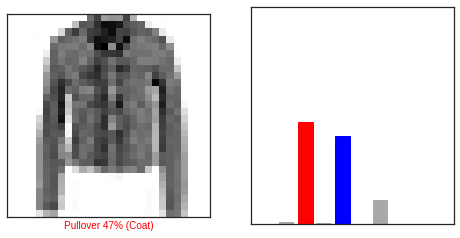

In [ ]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

이제 모델 예측 결과 여러 개를 눈으로 확인할 수 있도록 32(8x4)개를 출력하도록 합니다.

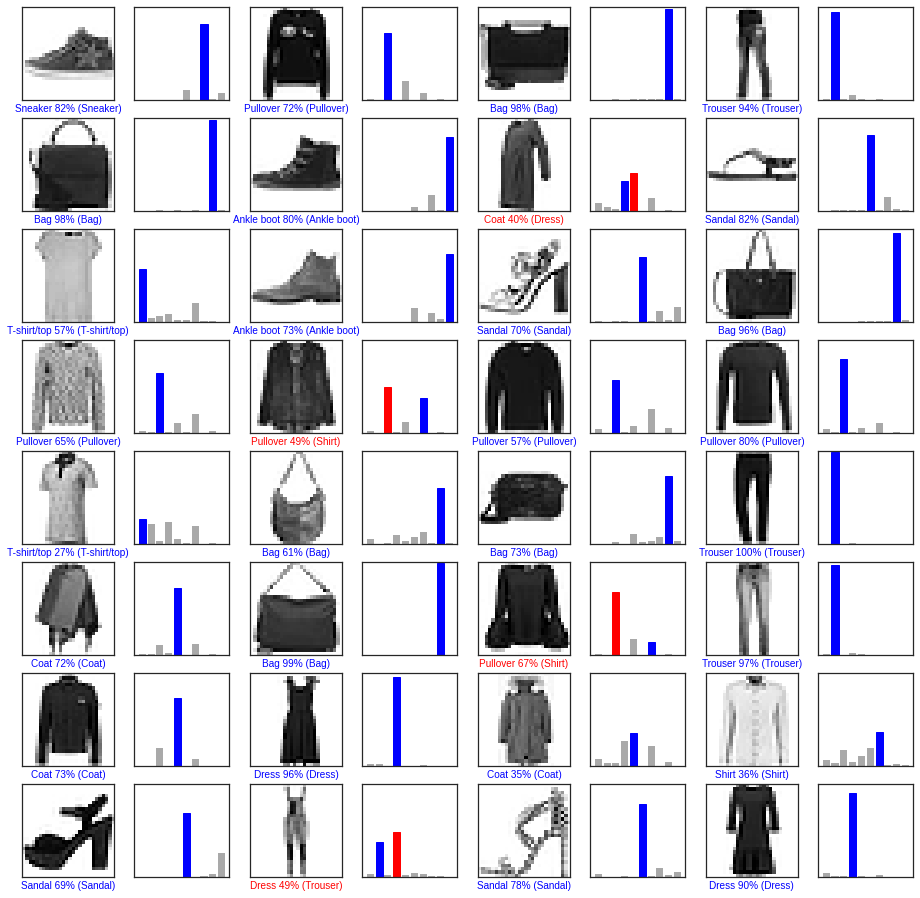

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

classification_report를 이용하여 Fashion MNIST를 분류하는 모델의 결과를 10개 분류 기준 별로 precision, recall, f1-score, support를 살펴볼 수 있습니다.

In [ ]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.78      0.77      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.69      0.62      0.66      1000
       Dress       0.75      0.84      0.79      1000
        Coat       0.64      0.73      0.68      1000
      Sandal       0.84      0.83      0.83      1000
       Shirt       0.50      0.40      0.44      1000
     Sneaker       0.83      0.86      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



confusion_matrix를 이용해서 예측한 레이블과 실제 레이블과의 일치 여부를 혼동 행렬(confusion matrix)로 시각화할 수 있습니다.

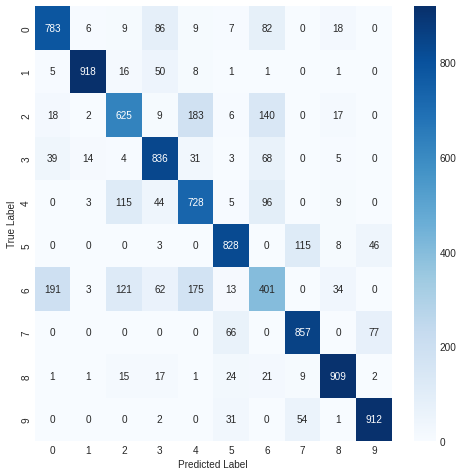

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**모델 최적화: Early Stopping**

딥러닝 모델이 학습을 진행하면서 가장 좋은 모델이 fashion_mnist_model.h5 파일로 저장되도록 콜백 함수로 ModelCheckpoint를 사용해 봅시다. 또한 val_loss 값을 10개씩 연속으로 모니터링하며 성능 변화가 없으면 조기 종료되도록 EarlyStopping을 사용합니다.

정의한 콜백 함수를 사용하여 fit() 함수를 실행하여 실제 모델 학습을 진행합시다.

In [ ]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5944 - accuracy: 0.7943 - val_loss: 0.5863 - val_accuracy: 0.7963
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5672 - accuracy: 0.8027 - val_loss: 0.5644 - val_accuracy: 0.8053
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5467 - accuracy: 0.8091 - val_loss: 0.5487 - val_accuracy: 0.8111
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5304 - accuracy: 0.8151 - val_loss: 0.5321 - val_accuracy: 0.8156
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5174 - accuracy: 0.8184 - val_loss: 0.5235 - val_accuracy: 0.8203
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5057 - accuracy: 0.8234 - val_loss: 0.5154 - val_accuracy: 0.8199
Epoch 7/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4962 - accuracy: 0.8272 - val_loss: 0.5055 - val_accuracy:

모델의 학습 히스토리를 시각화합니다.

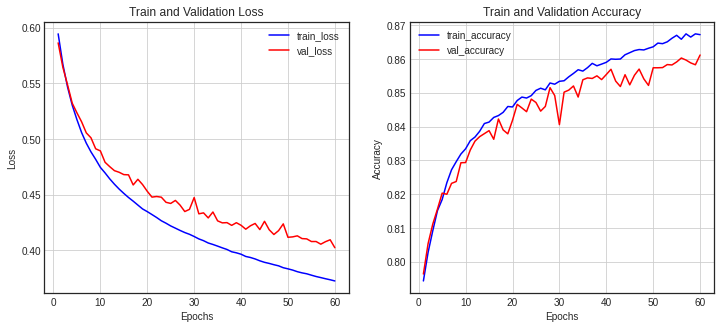

In [ ]:
show_history(history)

모델의 평가 결과도 테스트 데이터셋을 이용해 확인합니다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8458


[0.4221791625022888, 0.84579998254776]

**모델 최적화: 활성화 함수**

기존 모델에서는 활성화 함수로 선형 함수인 sigmoid를 사용하였는데, 비선형 함수인 relu로 변경하여 학습이 어떻게 진행되는지 살펴봅니다.

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7656 - accuracy: 0.7545 - val_loss: 0.5867 - val_accuracy: 0.8055
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5263 - accuracy: 0.8229 - val_loss: 0.5136 - val_accuracy: 0.8264
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4769 - accuracy: 0.8373 - val_loss: 0.5263 - val_accuracy: 0.8123
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4509 - accuracy: 0.8443 - val_loss: 0.4635 - val_accuracy: 0.8394
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4319 - accuracy: 0.8505 - val_loss: 0.4464 - val_accuracy: 0.8463
Epoch 6/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4166 - accuracy: 0.8559 - val_loss: 0.4449 - val_accuracy: 0.8474
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4045 - accuracy: 0.8598 - val_loss: 0.4245 - val_accuracy:

두 개의 모델 학습 히스토리를 차트로 비교할 수 있도록 시각화하는 diff_history() 함수를 정의합니다.

In [ ]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

기존 모델과 활성화 함수를 relu로 변경한 모델의 학습 결과를 시각화합니다.

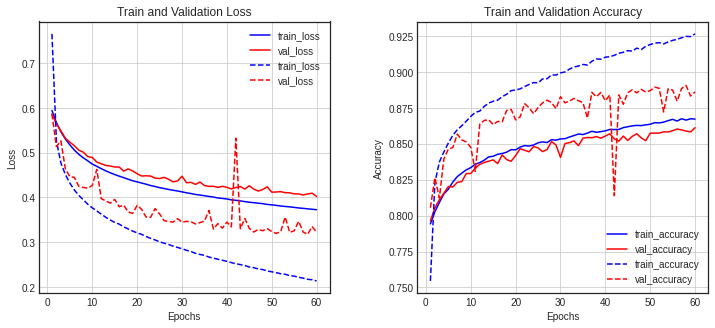

In [ ]:
diff_history(history, history2)

활성화 함수를 변경한 모델의 평가 결과를 확인합니다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8776


[0.3453572690486908, 0.8776000142097473]

**모델 최적화: 옵티마이저**

기존 모델에서는 옵티마이저로 SGD를 사용했는데, 좀 더 빠르고 효과적인 학습이 가능하도록 Adam으로 변경합니다.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3826 - accuracy: 0.8657 - val_loss: 0.3811 - val_accuracy: 0.8658
Epoch 2/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3307 - accuracy: 0.8790 - val_loss: 0.3516 - val_accuracy: 0.8764
Epoch 3/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3073 - accuracy: 0.8862 - val_loss: 0.3400 - val_accuracy: 0.8800
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2884 - accuracy: 0.8921 - val_loss: 0.3518 - val_accuracy: 0.8773
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2769 - accuracy: 0.8968 - val_loss: 0.3483 - val_accuracy: 0.8758
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2621 - accuracy: 0.9016 - val_loss: 0.3323 - val_accuracy: 0.8834
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2504 - accuracy: 0.9068 - val_loss: 0.3850 - val_accuracy:

기존 모델 학습 결과와 옵티마이저를 바꾼 모델의 학습 결과를 살펴보면, 학습이 빠르게 진행되어 조기에 종료되는 것을 알 수 있습니다. 다만, 과대적합이 발생하는 것을 알 수 있습니다.

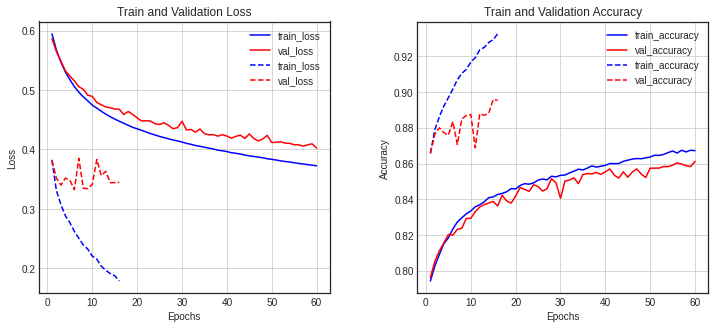

In [ ]:
diff_history(history, history3)

옵티마이저를 변경한 모델의 평가 결과를 확인합니다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3633 - accuracy: 0.8722


[0.36330536007881165, 0.8722000122070312]

**모델 최적화: 규제**

모델에서 과대적합이 발생하는 부분을 규제하기 위해서 중간의 Dense 레이어에 L2 규제 방법을 적용합니다.

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1093 - accuracy: 0.7756 - val_loss: 0.7522 - val_accuracy: 0.7866
Epoch 2/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.7251 - accuracy: 0.7925 - val_loss: 0.7179 - val_accuracy: 0.7916
Epoch 3/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6859 - accuracy: 0.8045 - val_loss: 0.6709 - val_accuracy: 0.8107
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6539 - accuracy: 0.8130 - val_loss: 0.6389 - val_accuracy: 0.8217
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6270 - accuracy: 0.8189 - val_loss: 0.6359 - val_accuracy: 0.8213
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6108 - accuracy: 0.8217 - val_loss: 0.6221 - val_accuracy: 0.8216
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.6022 - accuracy: 0.8254 - val_loss: 0.6539 - val_accuracy:

기존 모델 학습 결과와 L2 규제 방법을 적용한 모델의 학습 결과를 살펴보면, 성능은 일부 저하되지만 어느정도 과대적합을 억제하는 것을 알 수 있습니다.

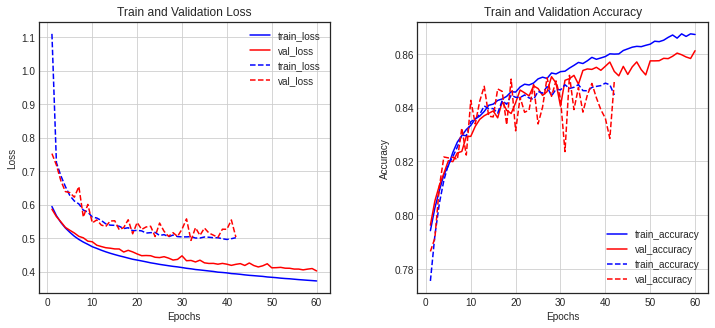

In [ ]:
diff_history(history, history4)

L2 규제 방법을 적용한 모델의 평가 결과를 확인합니다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.8452


[0.5121803283691406, 0.8452000021934509]

**모델 최적화: 드롭아웃**

모델에서 성능 저하를 최소화하면서 과대적합을 억제하기 위한 방법으로 Dense 레이어 사이에 50%의 Dropout 레이어를 적용합니다.

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5860 - accuracy: 0.7905 - val_loss: 0.4638 - val_accuracy: 0.8308
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4565 - accuracy: 0.8340 - val_loss: 0.4015 - val_accuracy: 0.8539
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4168 - accuracy: 0.8458 - val_loss: 0.3683 - val_accuracy: 0.8702
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3968 - accuracy: 0.8553 - val_loss: 0.3758 - val_accuracy: 0.8629
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3822 - accuracy: 0.8578 - val_loss: 0.3513 - val_accuracy: 0.8759
Epoch 6/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3710 - accuracy: 0.8629 - val_loss: 0.3436 - val_accuracy: 0.8774
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3589 - accuracy: 0.8661 - val_loss: 0.3535 - val_accuracy:

기존 모델 학습 결과와 드롭아웃을 적용한 방법의 학습 결과를 살펴보면, 과대적합을 잘 방지하고 있는 결과를 보여주고 있습니다.

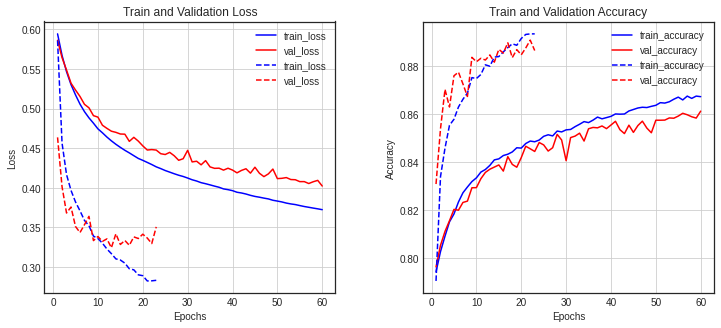

In [ ]:
diff_history(history, history5)

규제 방법 중에 L2 규제보다는 드롭아웃 방법이 더 좋은 결과를 보여주는 것을 알 수 있습니다.

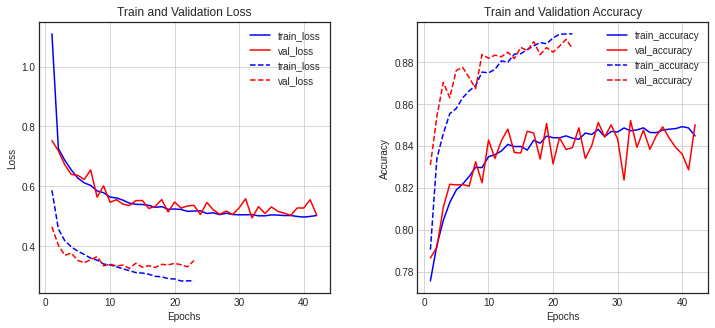

In [ ]:
diff_history(history4, history5)

드롭아웃 방법을 적용한 모델의 평가 결과를 확인합니다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6442 - accuracy: 0.8117


[0.6441759467124939, 0.8116999864578247]

**모델 최적화: 배치 정규화**

빠르고 효과적인 학습을 도와주는 배치 정규화도 적용해보기 위해 Dense 레이어 다음에 BatchNormalization 레이어를 추가하고, 이후 활성화 함수 Activation 레이어를 추가합니다.

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [ ]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.4854 - accuracy: 0.8325 - val_loss: 0.4541 - val_accuracy: 0.8468
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3905 - accuracy: 0.8604 - val_loss: 0.3974 - val_accuracy: 0.8631
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3611 - accuracy: 0.8692 - val_loss: 0.4760 - val_accuracy: 0.8322
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3418 - accuracy: 0.8766 - val_loss: 0.3663 - val_accuracy: 0.8689
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3234 - accuracy: 0.8823 - val_loss: 0.3697 - val_accuracy: 0.8690
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3104 - accuracy: 0.8873 - val_loss: 0.3514 - val_accuracy: 0.8764
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3003 - accuracy: 0.8885 - val_loss: 0.3641 - val_accuracy:

기존 모델 결과와 배치 정규화를 적용한 모델의 학습 결과를 살펴보면, 학습도 빠르게 진행되는 결과를 보여주고 있습니다.

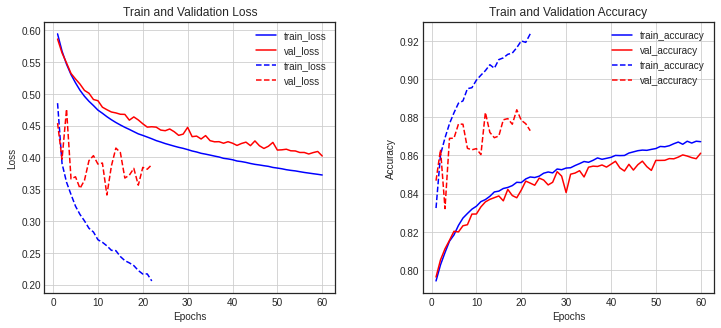

In [ ]:
diff_history(history, history6)

배치 정규화 방법을 적용한 모델의 평가 결과를 확인합니다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8734


[0.35958951711654663, 0.8733999729156494]

**모델 최적화: 배치 정규화 + 드롭아웃**

배치 정규화를 통해 안정적인 학습이 가능하지만, 규제 방법 중 좋은 성능을 보였던 드롭아웃을 함께 적용해보도록 하겠습니다. 기존 배치 정규화를 적용한 모델에 Activation 레이어 이후에 Dropout 레이어를 추가해주면 됩니다.

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [ ]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.5933 - accuracy: 0.7999 - val_loss: 0.4464 - val_accuracy: 0.8433
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4828 - accuracy: 0.8288 - val_loss: 0.4668 - val_accuracy: 0.8271
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4591 - accuracy: 0.8368 - val_loss: 0.4143 - val_accuracy: 0.8517
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4480 - accuracy: 0.8402 - val_loss: 0.3881 - val_accuracy: 0.8636
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4320 - accuracy: 0.8455 - val_loss: 0.4101 - val_accuracy: 0.8549
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4133 - accuracy: 0.8515 - val_loss: 0.3672 - val_accuracy: 0.8716
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4087 - accuracy: 0.8528 - val_loss: 0.4030 - val_accuracy:

배치 정규화와 드롭아웃을 둘다 적용하였기 때문에 안정적인 학습과 더불어 과대적합도 줄여주는 결과를 볼 수 있습니다.

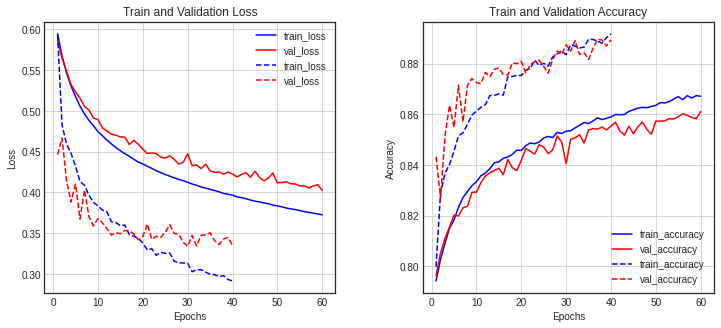

In [ ]:
diff_history(history, history7)

배치 정규화와 드롭아웃을 둘 다 적용한 모델의 평가 결과를 살펴봅니다.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8777


[0.3557695150375366, 0.8776999711990356]

**모델 결과 분석**

랜덤으로 데이터를 선별하여 최종적으로 최적화를 수행한 모델이 분류한 결과를 시각화합니다.

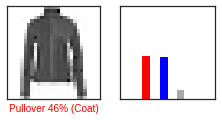

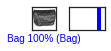

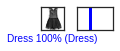

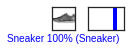

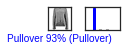

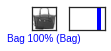

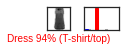

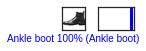

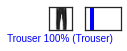

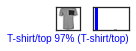

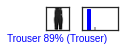

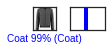

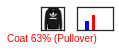

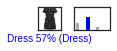

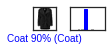

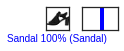

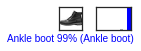

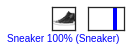

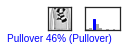

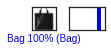

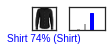

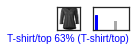

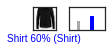

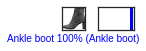

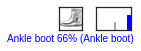

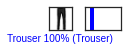

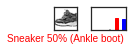

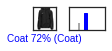

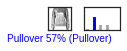

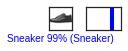

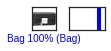

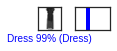

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

    plt.show()

최적화한 모델의 분류 결과를 클래스별로 성능 지표를 살펴봅니다.

In [ ]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.78      0.82      0.80      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.71      0.59      0.65      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



모델의 결과를 혼동 행렬를 통해서 시각화합니다.

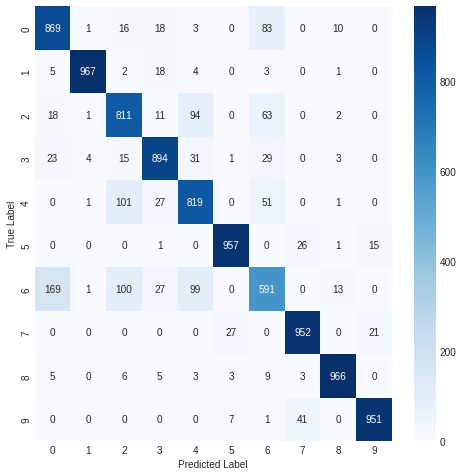

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Fashion MNIST를 분류하는 딥러닝 모델이 최적화를 통해서 기본 모델 보다 상당히 높은 성능을 보여주는 것을 알 수 있습니다. 그러나 최적화를 수행하여도 모델 평가 결과는 90%를 넘기기 어렵습니다.

딥러닝 모델에서 구조적으로 이미지를 입력으로 사용할 때 적합한 CNN(Convolution Neural Network) 계열의 아키텍처가 있고, 텍스트를 입력으로 사용할 때 적합한 RNN(Recurrent Neural Network) 계열의 아키텍처가 있습니다. 즉, 기본적인 신경망 구조가 아닌 입력되는 데이터의 특성을 고려한 아키텍처가 필요합니다.